<a href="https://colab.research.google.com/github/meghadas123/Galaxy-Formation-and-Evolution-project/blob/main/Galaxy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PHY438 Galaxy Formation and Evolution**

**Constructing a Galaxy Luminosity Function Assignment**

**Specify the location and load the given mock galaxy catalogue data**




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Specify the url path to the data file in GitHub
galaxy_catalogue_url = "https://raw.githubusercontent.com/meghadas123/Galaxy-Formation-and-Evolution-project/main/Survey_Das.csv"

 **Given, the survey covers 10 square degrees, the galaxy has an apparent K-band magnitude of 22 mag, it would be detected at the 1σ level.
*Also* as the detections below 3σ (i.e., in this case fainter than 22 − 2.5log10(3) ≈ 20.8) are not considered robust and should therefore not be included in the analysis:**

In [2]:
# To calculate the detection threshold for robust detections
import numpy as np
lim_mag = 22
detection_threshold = lim_mag - 2.5 * np.log10(3)

# Read the catalogue file into a pandas DataFrame
galaxy_catalogue = pd.read_csv(galaxy_catalogue_url)

# To filter out any non-robustly detected galaxies
robust_galaxies = galaxy_catalogue[galaxy_catalogue['K-band mag'] >= detection_threshold]

# To create a new catalogue with only robustly detected galaxies
robust_galaxies.to_csv('robust_galaxies_catalogue_Das.csv', index=False)

print("Non-robustly detected galaxies have been removed. Filtered catalogue saved.")

Non-robustly detected galaxies have been removed. Filtered catalogue saved.


 **Plot to show the number counts of the robustly-detected galaxies**

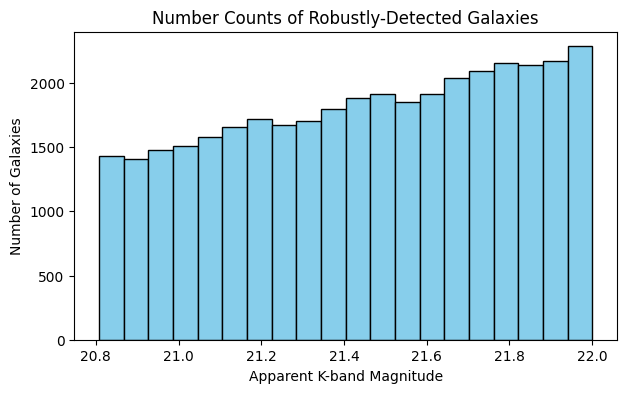

In [3]:
# Load the robustly detected galaxies data
robust_galaxies = pd.read_csv('robust_galaxies_catalogue_Das.csv')

# To group galaxies based on their apparent K-band magnitudes and count the number of galaxies in each bin
galaxy_counts = robust_galaxies['K-band mag'].value_counts().sort_index()

# Plot the number counts of robustly-detected galaxies
plt.figure(figsize=(7, 4))
plt.hist(robust_galaxies['K-band mag'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Apparent K-band Magnitude')
plt.ylabel('Number of Galaxies')
plt.title('Number Counts of Robustly-Detected Galaxies')
plt.show()

**Out of the robustly-detected galaxies we need to select only z < 0.1 galaxies**

In [4]:
# To select only galaxies with redshift (z) less than 0.1
z_less_01_galaxies = robust_galaxies[robust_galaxies['Redshift'] < 0.1]

# Save the selected galaxies to a new file
z_less_01_galaxies.to_csv('z_less_01_galaxies.csv', index=False)

print("Selected galaxies with z < 0.1. Saved to z_less_01_galaxies.csv.")

Selected galaxies with z < 0.1. Saved to z_less_01_galaxies.csv.


**Now to calculate the volume of the z < 0.1 Universe covered by the survey, assume a Planck 2018 cosmology**

**Also, the volume, V_s, between redshifts z_1 and z_2 contained within a X square-degree survey is given by
           V_s = [X/41252.96]*[V_c(z_2) − V_c(z_1)], where V_c is the cosmological volume**




In [5]:
from astropy.cosmology import Planck18 as cosmo

# To define the constants
survey_area = 10  # Survey area in square degrees
z_lower = 0.0  # Lower redshift limit for z < 0.1
z_upper = 0.1  # Upper redshift limit for z < 0.1

# Calculate the cosmological volume V_c(z) for the redshift limits
V_c_lower = (4/3) * np.pi * cosmo.comoving_distance(z_lower).value**3
V_c_upper = (4/3) * np.pi * cosmo.comoving_distance(z_upper).value**3

# To calculate the volume of the Universe covered by the survey for z < 0.1 galaxies
V_s = survey_area / 41252.96 * (V_c_upper - V_c_lower)

print(f"Volume of the Universe covered by the survey for z < 0.1 galaxies: {V_s:.2f} cubic Mpc")

Volume of the Universe covered by the survey for z < 0.1 galaxies: 82184.46 cubic Mpc


**To calculate the luminosity distance of each z < 0.1 galaxy**

In [6]:
# Load the catalogue of galaxies with z < 0.1
z_less_01_galaxies = pd.read_csv('z_less_01_galaxies.csv')

# Calculate the luminosity distance for each galaxy with z < 0.1
luminosity_distances = []
for index, galaxy in z_less_01_galaxies.iterrows():
    z = galaxy['Redshift']
    luminosity_distance = cosmo.luminosity_distance(z).value  # in Mpc
    luminosity_distances.append(luminosity_distance)

# Add the calculated luminosity distances to the catalogue
z_less_01_galaxies['Luminosity Distance (Mpc)'] = luminosity_distances

# Save the updated catalogue with luminosity distances
z_less_01_galaxies.to_csv('z_less_01_galaxies_with_luminosity_distances.csv', index=False)

print("Luminosity distances calculated for galaxies with z < 0.1. Saved to z_less_01_galaxies_with_luminosity_distances.csv.")

Luminosity distances calculated for galaxies with z < 0.1. Saved to z_less_01_galaxies_with_luminosity_distances.csv.


 **To calculate the absolute magnitude of each z < 0.1 galaxy including errors**

 **using this formula we can do this M=m−5log10(dL)+5**

In [7]:
# Load the catalogue of galaxies with z < 0.1 and luminosity distances
z_less_01_galaxies = pd.read_csv('z_less_01_galaxies_with_luminosity_distances.csv')

# Calculate the absolute magnitude for each galaxy
absolute_magnitudes = []
absolute_magnitude_errors = []

# Calculate the absolute magnitudes
z_less_01_galaxies['Absolute Magnitude'] = z_less_01_galaxies['K-band mag'] - 5 * np.log10(z_less_01_galaxies['Luminosity Distance (Mpc)'] * 10**6) + 5

# Propagate error to calculate the error in absolute magnitude
z_less_01_galaxies['Absolute Magnitude Error'] = np.sqrt(z_less_01_galaxies['K-band dmag'] ** 2)

# Save the updated catalog with absolute magnitudes
z_less_01_galaxies.to_csv('z_less_01_galaxies_with_absolute_magnitudes.csv', index=False)

print("Absolute magnitudes calculated for galaxies with z < 0.1. Saved to z_less_01_galaxies_with_absolute_magnitudes.csv.")

Absolute magnitudes calculated for galaxies with z < 0.1. Saved to z_less_01_galaxies_with_absolute_magnitudes.csv.


**To calculate the limiting absolute magnitude:
Using limiting_flux =10^(lim_mag−22.5)/−2.5, where the value 22.5 is used as a reference point in the formula for calculating the limiting flux based on the limiting apparent magnitude. This reference point is chosen because of the standard magnitude system used in astronomy, where the zero point is defined such that a star of zero apparent magnitude would have a specific flux at Earth.**

In [8]:
# We know limiting apparent magnitude of the survey
lim_mag = 22

# Flux ratio for robust detection
flux_ratio = 3

# Calculate the limiting flux
limiting_flux = 10**((lim_mag - 22.5) / -2.5)

# Calculate the limiting absolute magnitude at z = 0.1
limiting_absolute_mag = lim_mag - 5 * (np.log10(3) - np.log10(limiting_flux))

print("Limiting Absolute Magnitude at z = 0.1:", limiting_absolute_mag)

Limiting Absolute Magnitude at z = 0.1: 20.614393726401687


**plot showing the luminosity function of the z < 0.1 galaxies**

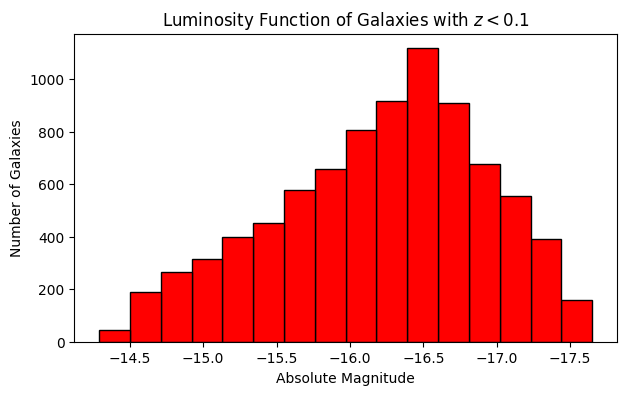

In [13]:
from scipy.optimize import curve_fit

# Load the catalog of galaxies with absolute magnitudes
z_less_01_galaxies = pd.read_csv('z_less_01_galaxies_with_absolute_magnitudes.csv')

# Define the absolute magnitude bins
bin_width = 0.21  # Choose an appropriate bin width for your data
min_magnitude = z_less_01_galaxies['Absolute Magnitude'].min()
max_magnitude = z_less_01_galaxies['Absolute Magnitude'].max()
bins = np.arange(min_magnitude, max_magnitude + bin_width, bin_width)

# Create histogram of absolute magnitudes
hist, bin_edges = np.histogram(z_less_01_galaxies['Absolute Magnitude'], bins=bins)

# Plot the luminosity function
plt.figure(figsize=(7, 4))
plt.bar(bin_edges[:-1], hist, width=bin_width, edgecolor='black', color='red')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Number of Galaxies')
plt.title('Luminosity Function of Galaxies with $z < 0.1$')
plt.gca().invert_xaxis()  # Invert x-axis for magnitude scale
plt.show()

**To plot the best-fitting Schechter function on the luminosity function, and report the best-fitting values of M∗, ϕ∗ and α, including their uncertainties**

<ipython-input-14-ccdd66da6f79>:3: RuntimeWarning: overflow encountered in power
  return 0.4 * np.log(10) * phi_star * (10 ** ((M_star - M) * (1 + alpha))) * np.exp(-10 ** (-(M - M_star)))
<ipython-input-14-ccdd66da6f79>:3: RuntimeWarning: invalid value encountered in multiply
  return 0.4 * np.log(10) * phi_star * (10 ** ((M_star - M) * (1 + alpha))) * np.exp(-10 ** (-(M - M_star)))


Best-fitting parameters:
phi_star: 11232.036808766301 +/- 781.5137065456128
M_star: -16.8392422700027 +/- 0.05080831083310476
alpha: -0.5633264399380632 +/- 0.04183375335957126


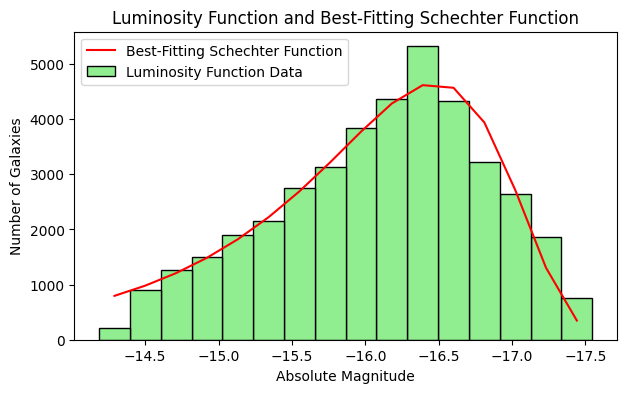

In [14]:
# Define the Schechter function
def schechter_function(M, phi_star, M_star, alpha):
    return 0.4 * np.log(10) * phi_star * (10 ** ((M_star - M) * (1 + alpha))) * np.exp(-10 ** (-(M - M_star)))

# Calculate the bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Scale the histogram by the width of the magnitude bins
hist_scaled = hist / bin_width

# Perform curve fitting
best_fit, covar_param = curve_fit(schechter_function, bin_centers, hist_scaled, p0=[10, -20, -1])  # Initial guess for parameters

# Extract the best-fitting parameters and their uncertainties
phi_star_fit, M_star_fit, alpha_fit = best_fit
phi_star_err, M_star_err, alpha_err = np.sqrt(np.diag(covar_param))

print("Best-fitting parameters:")
print(f"phi_star: {phi_star_fit} +/- {phi_star_err}")
print(f"M_star: {M_star_fit} +/- {M_star_err}")
print(f"alpha: {alpha_fit} +/- {alpha_err}")

# Plot the best-fitting Schechter function on the luminosity function plot
plt.figure(figsize=(7, 4))
plt.bar(bin_centers, hist_scaled, width=bin_width, edgecolor='black', color='lightgreen', label='Luminosity Function Data')
plt.plot(bin_centers, schechter_function(bin_centers, *best_fit), color='red', label='Best-Fitting Schechter Function')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Number of Galaxies')
plt.title('Luminosity Function and Best-Fitting Schechter Function')
plt.gca().invert_xaxis()  # Invert x-axis for magnitude scale
plt.legend()
plt.show()